# Methods and Plan & Computational Code and Output 
### Individual Assignment 2 (Yiting Sun 92119338)

#### Data Description:

The Census Income dataset, also known as the "Adult" dataset, is derived from the 1994 US Census by Barry Becker. The dataset investigates whether annual income of an individual exceeds $\$50,000$ per year based on census data. It contains 48,842 observations and 14 features. The target variable (response) is whether the individual's income is more than $\$50,000 $ or not, and the predictor variables include a variety of demographic and socio-economic attributes including age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native countries. 

#### Explanatory Variables (14):
- `age`: (Integer) - continuous 
- `workclass`: (Categorical) - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- `fnlwgt`: (Integer) - continuous
- `education`: (Categorical) - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- `education-num`: (Integer) - continuous
- `marital-status`: (Categorical) - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
- `occupation`: (Categorical) - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
- `relationship`: (Categorical) - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
- `race`: (Categorical) - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- `sex`: (Binary) - Female, Male
- `capital-gain`: (Integer) - continuous
- `capital-loss`: (Integer) - continuous
- `hours-per-week`: (Integer) - continuous
- `native-country`: (Categorical) - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
  
#### Reponse Variable:
- `income`: (Binary: >50k, <=50k)

#### Research Question: 

Can gender, education level, and occupation predict whether an individual's annual income exceeds $ \$50,000$ per year?

This question focuses on three explanatory variables: gender, education, and occupation, and aims to predict whether an individual's income exceeds $50K (the response variable). The task involves both prediction and inference, as we will use these features to predict income level and also draw inferences about which factors have the strongest relationships with higher income levels. 

#### Reading Our Dataset

Importing the libraries that may be needed for our project.

In [67]:
library(tidyverse) # For data cleaning, plotting, etc
library(knitr)     # For table centering and justify
library(infer)     # Calculating simulation-based approaches of inference
library(dplyr)     # Remove rows with missing value
library(repr)
library(broom)
library(leaps)
library(moderndive)
library(latex2exp)
library(tidymodels)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Let's read the data.

In [68]:
census_income <- read.csv("adult.data", header = FALSE, sep = ",")

head(census_income, 3)
tail(census_income, 3)

V1 V2                V3     V4         V5 V6                 
1 39  State-gov         77516  Bachelors 13  Never-married     
2 50  Self-emp-not-inc  83311  Bachelors 13  Married-civ-spouse
3 38  Private          215646  HS-grad    9  Divorced          
  V7                 V8             V9     V10   V11  V12 V13 V14           
1  Adm-clerical       Not-in-family  White  Male 2174 0   40   United-States
2  Exec-managerial    Husband        White  Male    0 0   13   United-States
3  Handlers-cleaners  Not-in-family  White  Male    0 0   40   United-States
  V15   
1  <=50K
2  <=50K
3  <=50K

V1 V2            V3     V4       V5 V6                  V7              
32559 58  Private      151910  HS-grad 9   Widowed             Adm-clerical   
32560 22  Private      201490  HS-grad 9   Never-married       Adm-clerical   
32561 52  Self-emp-inc 287927  HS-grad 9   Married-civ-spouse  Exec-managerial
      V8         V9     V10     V11   V12 V13 V14            V15   
32559  Unmarried  White  Female     0 0   40   United-States  <=50K
32560  Own-child  White  Male       0 0   20   United-States  <=50K
32561  Wife       White  Female 15024 0   40   United-States  >50K

Since there is no column names for each variable, I will assign them.

In [69]:
colnames(census_income) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship",
                            "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income")

head(census_income, 3)
tail(census_income, 3)

age workclass         fnlwgt education  education_num marital_status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
  occupation         relationship   race   sex   capital_gain capital_loss
1  Adm-clerical       Not-in-family  White  Male 2174         0           
2  Exec-managerial    Husband        White  Male    0         0           
3  Handlers-cleaners  Not-in-family  White  Male    0         0           
  hours_per_week native_country income
1 40              United-States  <=50K
2 13              United-States  <=50K
3 40              United-States  <=50K

age workclass     fnlwgt education education_num marital_status     
32559 58   Private      151910  HS-grad  9              Widowed           
32560 22   Private      201490  HS-grad  9              Never-married     
32561 52   Self-emp-inc 287927  HS-grad  9              Married-civ-spouse
      occupation       relationship race   sex     capital_gain capital_loss
32559  Adm-clerical     Unmarried    White  Female     0        0           
32560  Adm-clerical     Own-child    White  Male       0        0           
32561  Exec-managerial  Wife         White  Female 15024        0           
      hours_per_week native_country income
32559 40              United-States  <=50K
32560 20              United-States  <=50K
32561 40              United-States  >50K

Then, I will select the columns I need and ensure that any missing values contained in our data are filtered out.

In [70]:
filtered_census_income <- census_income %>%
    select(sex, education, education_num, occupation, income) %>%
    mutate(occupation = str_trim(occupation)) %>%
    filter(occupation != "?")

head(filtered_census_income, 3)
tail(filtered_census_income, 3)

sex   education  education_num occupation        income
1  Male  Bachelors 13            Adm-clerical       <=50K
2  Male  Bachelors 13            Exec-managerial    <=50K
3  Male  HS-grad    9            Handlers-cleaners  <=50K

sex     education education_num occupation      income
30716  Female  HS-grad  9             Adm-clerical     <=50K
30717  Male    HS-grad  9             Adm-clerical     <=50K
30718  Female  HS-grad  9             Exec-managerial  >50K

After removing the missing values, there are 30718 observations left.

### Visualizing the Data

1. Bar Plot of Income by Gender: show the proportion of individuals with income above and below $50K, split by gender. This helps visualize whether gender is associated with income levels.

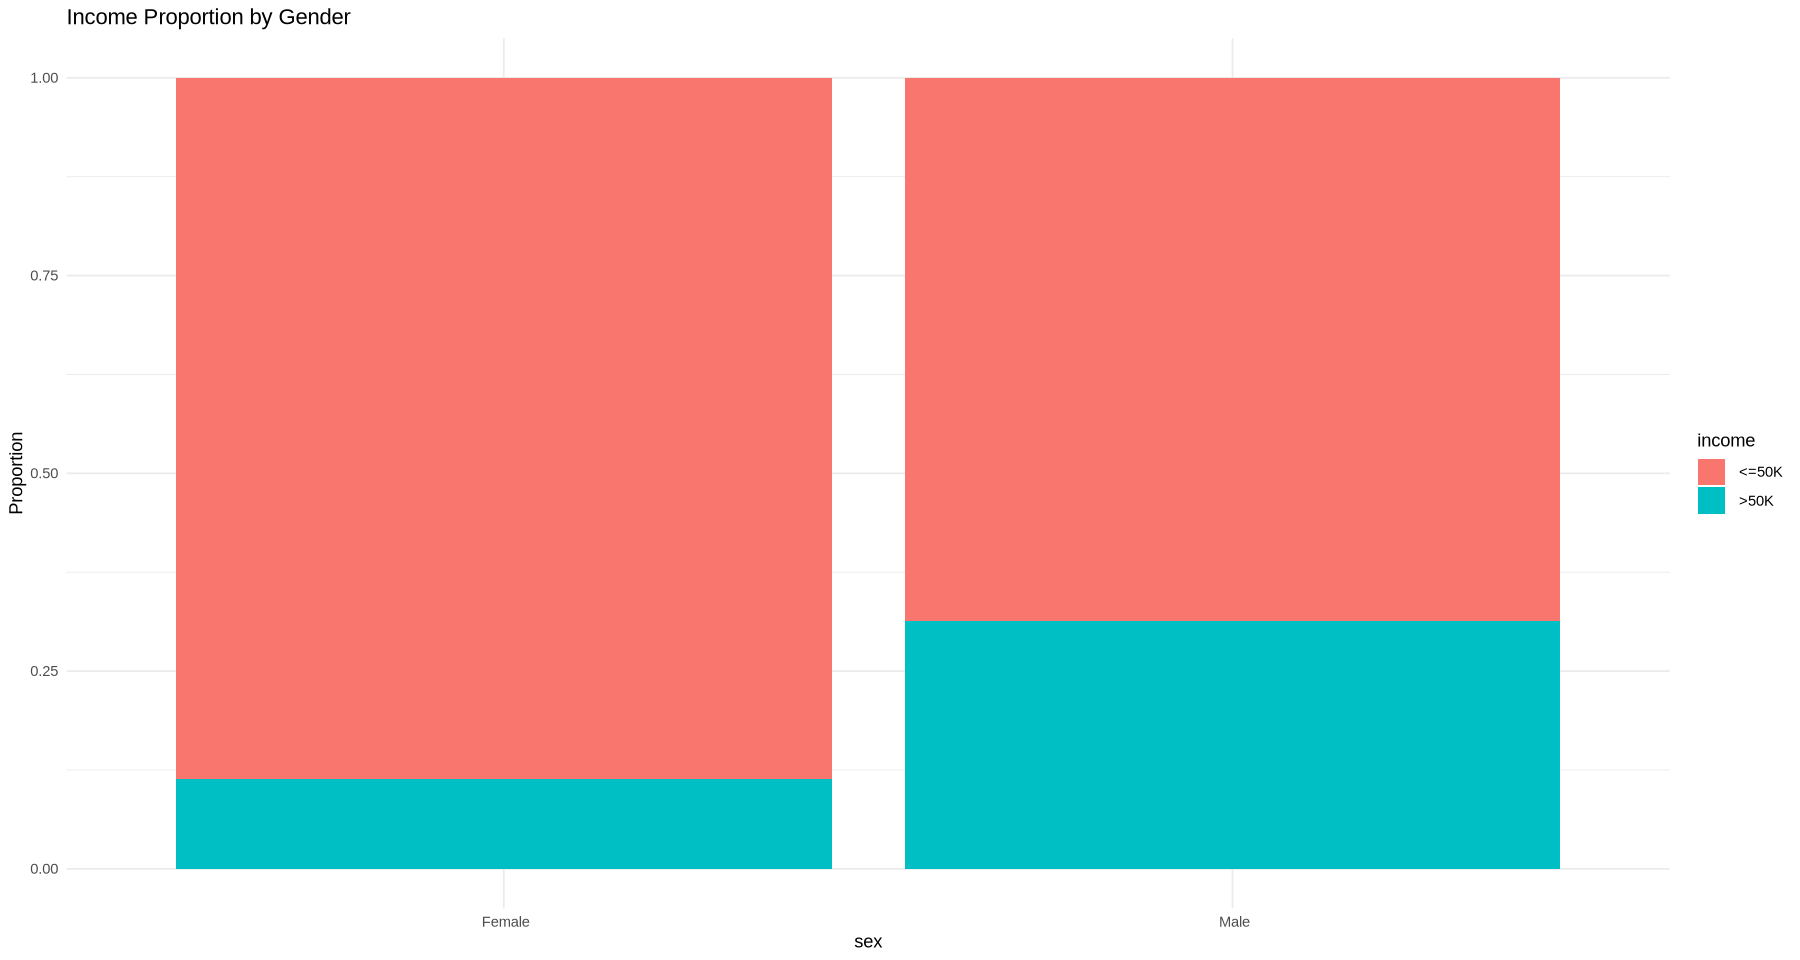

In [15]:
ggplot(filtered_census_income, aes(x = sex, fill = income)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Income Proportion by Gender") +
    theme_minimal()

2. Bar plot of Income by Occupation: show the proportion of individuals with incomes above and below $50K across different occupations. This can highlight which occupations have higher frequencies of high income.

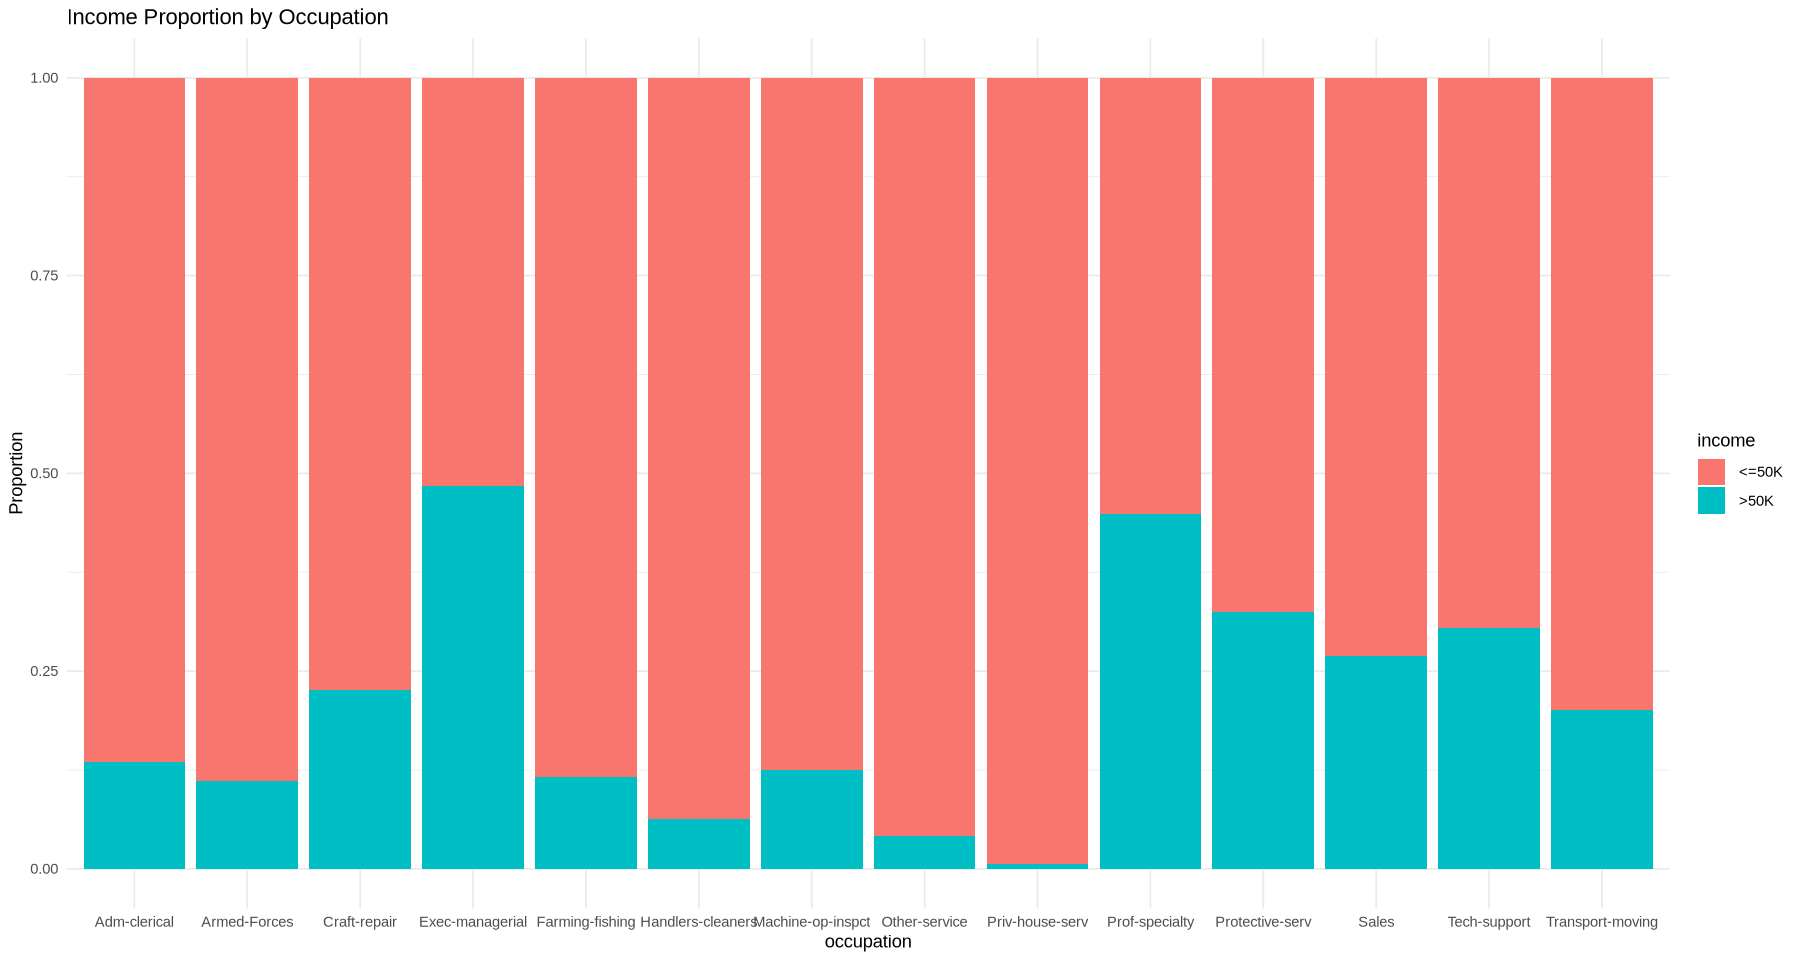

In [16]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(filtered_census_income, aes(x = occupation, fill = income)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Income Proportion by Occupation") +
    theme_minimal()

3. Bar Plot of Income by Education Level: observe the distribution of income levels across different education levels, highlighting any trends between education level and the likelihood of earning above $50K.

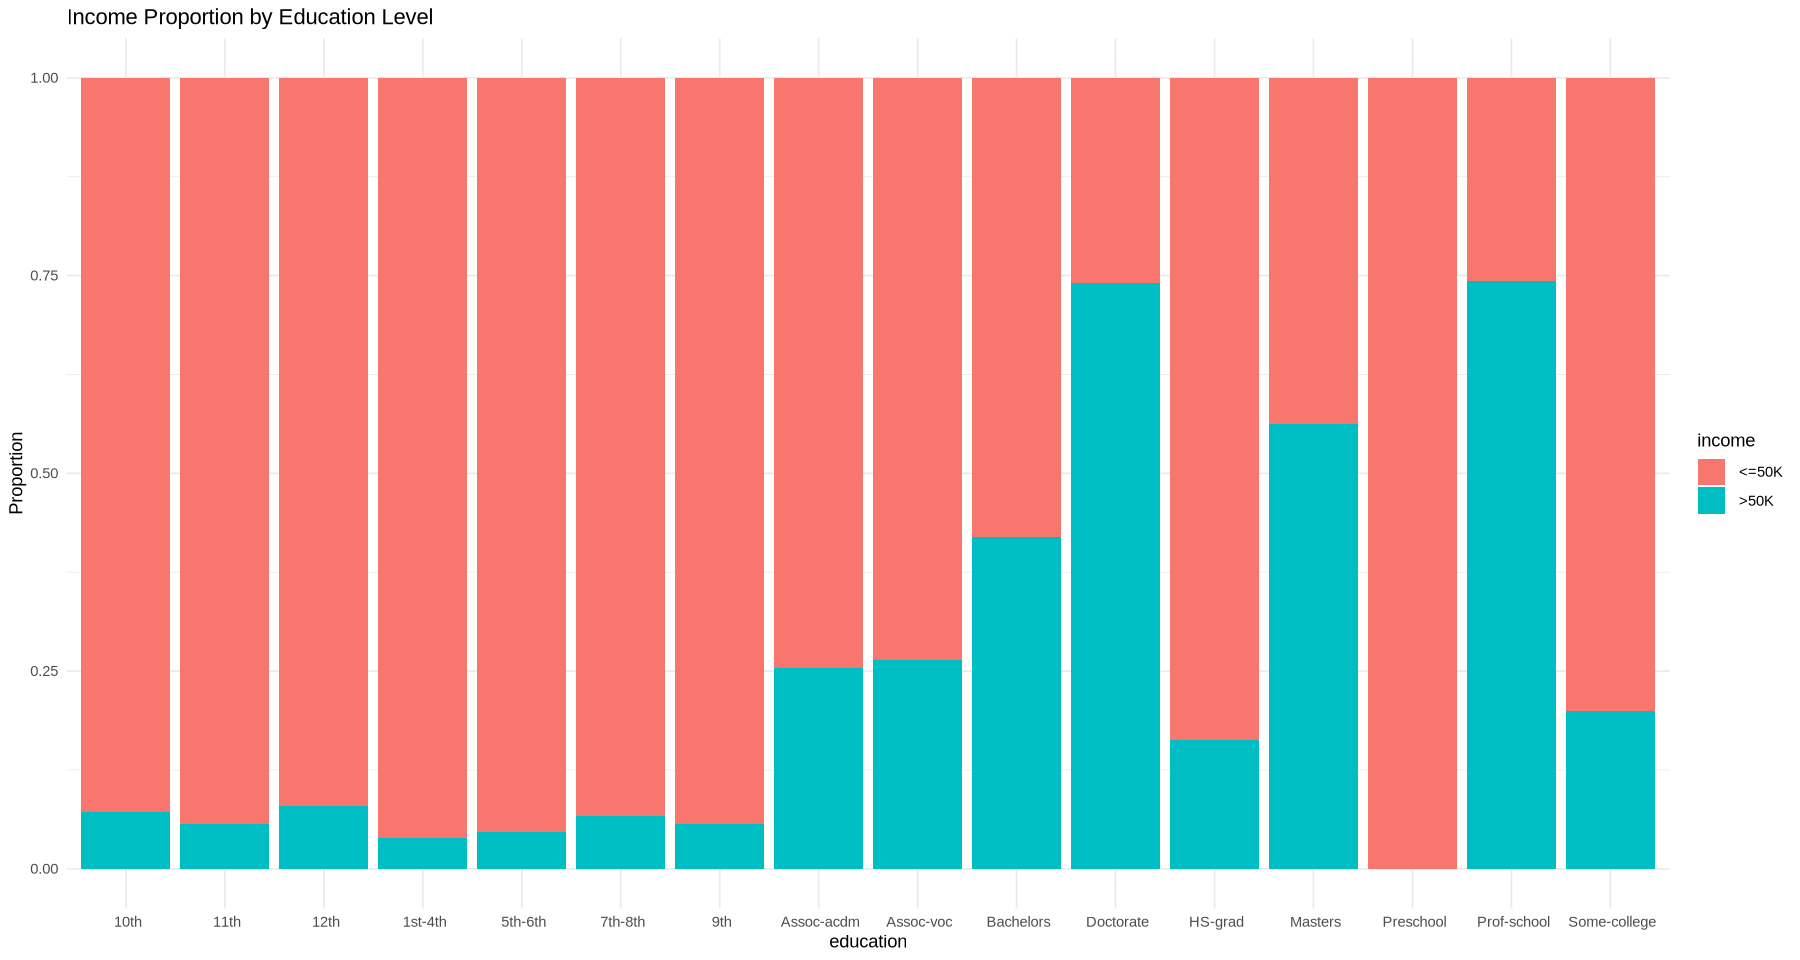

In [17]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(filtered_census_income, aes(x = education, fill = income)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Income Proportion by Education Level") +
    theme_minimal()

4. Box Plot of Education Years (education_num) by Income: display the distribution of education_num by income level (above or below $50K) shows whether higher education correlates with higher income.

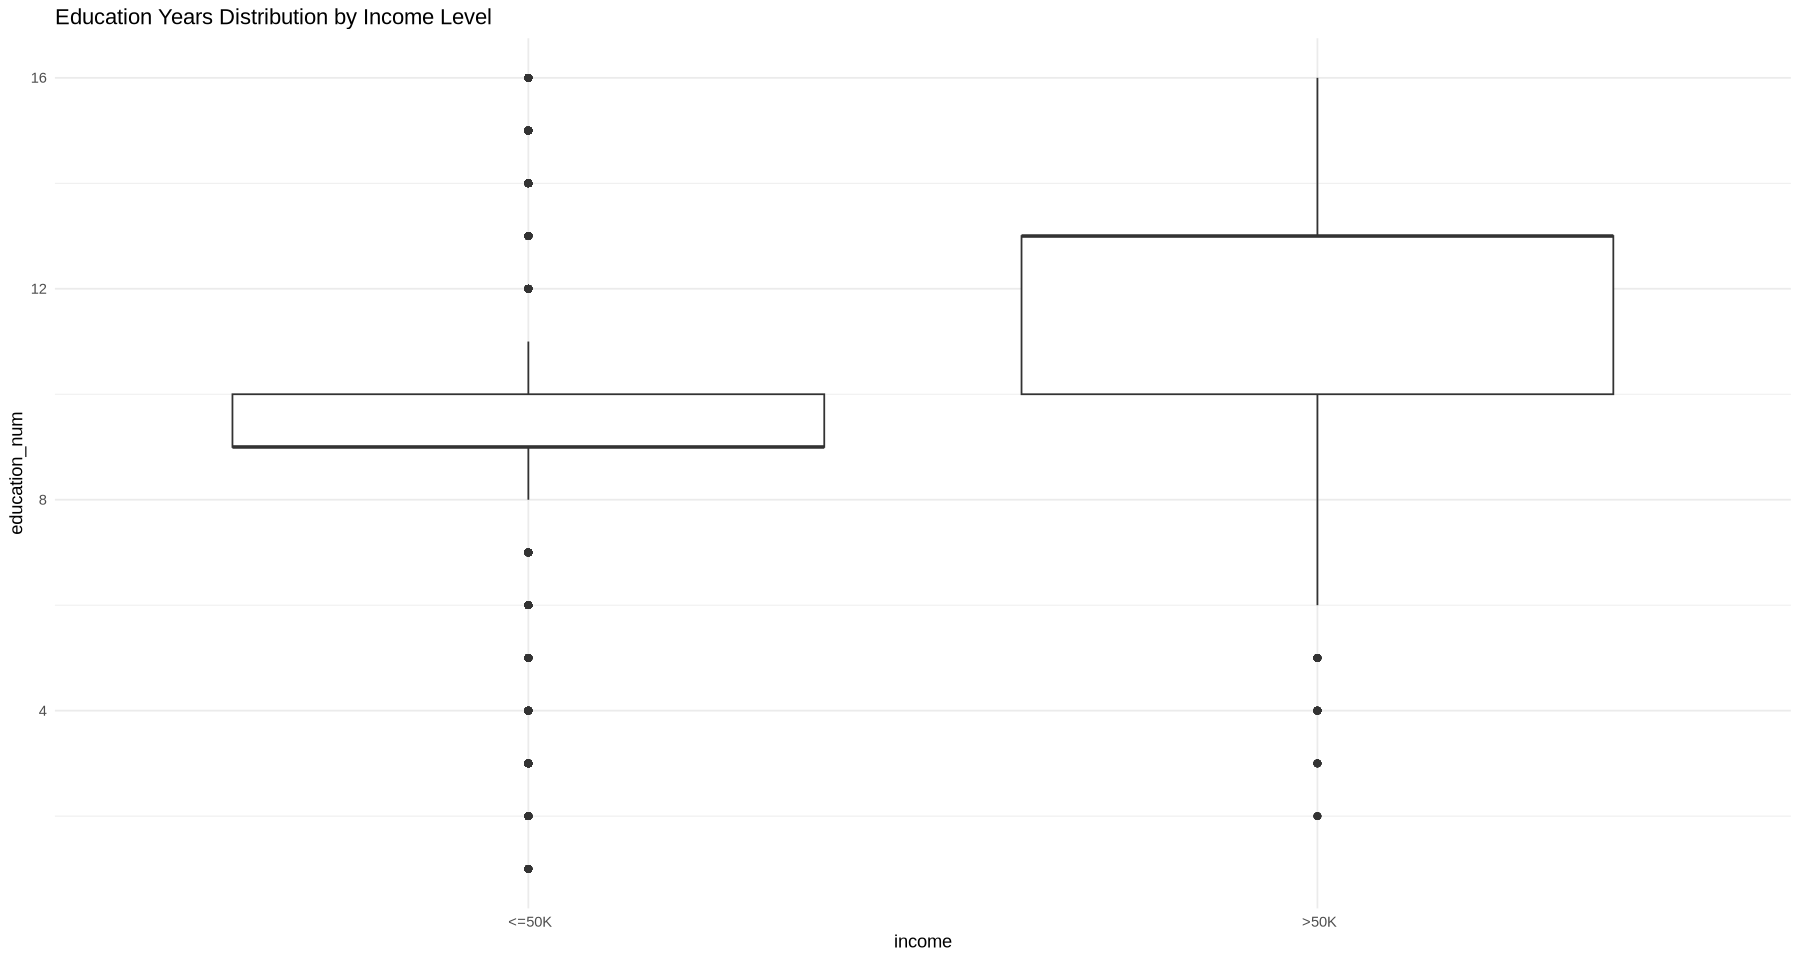

In [8]:
ggplot(filtered_census_income, aes(x = income, y = education_num)) +
    geom_boxplot() +
    labs(title = "Education Years Distribution by Income Level") +
    theme_minimal()

5. Bar Plot of Income by Occupation and Gender: with income distribution across occupations, separated by gender, helps examine how occupation and gender interact in relation to income.

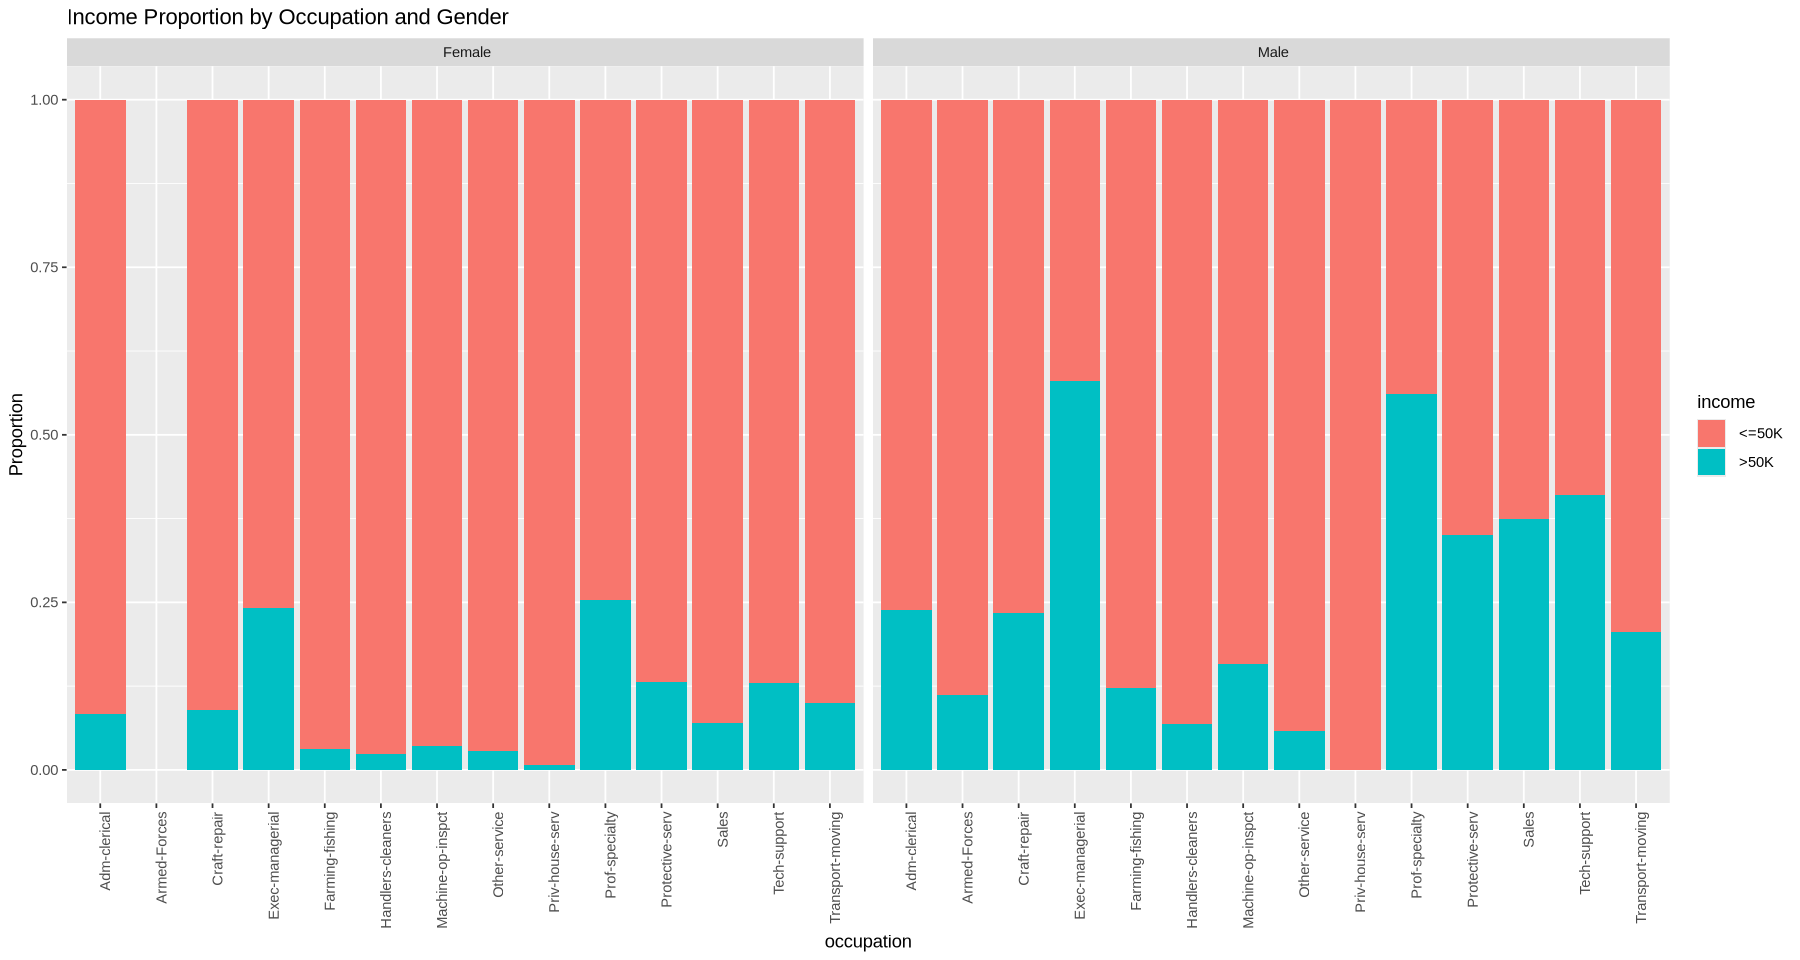

In [9]:
ggplot(filtered_census_income, aes(x = occupation, fill = income)) +
    geom_bar(position = "fill") +
    facet_wrap(~ sex) +
    labs(y = "Proportion", title = "Income Proportion by Occupation and Gender") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

#### Methods and Plan

To address my question of interest, I would construct a predictive model first by using LASSO (Least Absolute Shrinkage and Selection Operator) regression and determine if the three chosen explanatory variables can predict the response variable.

This method is appropriate because:
-  LASSO regression automatically performs variable selection by shrinking less important coefficients to zero. This aligns with my goal to determine which variables (among gender, education, occupation, etc.) are most significant predictors of income level.

-  LASSO regression enforces regularization which helps mitigate overfitting, especially useful when dealing with many predictors (in this case, 14 explanatory variables) or when some predictors are irrelevant or redundant.

-  Since LASSO regression simplifies the model and reduces the number of predictors, it can improve interpretability without sacrificing predictive power. Therefore it achieves better predictive performance comparing to other methods without regularization.

-  LASSO regression is useful when handling correlated variables. It can shrink the coefficients of one variable while keeping the other variable.

Assumptions for LASSO regression:

- LASSO regression assumes linarity between predictors and response variable.

- Predictos are standardized with z-score.
  
- Each observations should be independent from each other.

- Errors are normally distributated with constant variance.

- Sample size is sufficient relative to the number of predictors.

Potential limitations/weaknesses:

- LASSO's estimators are biased. Bias estimators are estimators whose sampling distributions are not centred on the true value of the parameter.
  
- It can be difficult to interpret since the coefficients of some variables may be shrinked to zero, which makes it difficult to learn about the relationship between the predictors and the response variable.

- It's computationally expensive which may not suitable for large dataset.

#### Implementation of a proposed model

To prepare the dataset, I will remove observations with missing values (Based on the introduction of the dataset, variables "workclass, occupation", and "native country" contain missing values shown as "?").

In [89]:
cleaned_data <- census_income %>%
    mutate(workclass = str_trim(workclass),
           occupation = str_trim(occupation),
           native_country = str_trim(native_country),
           income = str_trim(income)) %>%
    filter(workclass != "?",
           occupation != "?",
           native_country != "?")

nrow(census_income)
nrow(cleaned_data)

[1] 32561

[1] 30162

The cleaned data has 30162 observations.

Convert the categorical variables to dummy variables.

In [90]:
cleaned_data$workclass <- as.factor(cleaned_data$workclass)
cleaned_data$education <- as.factor(cleaned_data$education)
cleaned_data$marital_status <- as.factor(cleaned_data$marital_status)
cleaned_data$occupation <- as.factor(cleaned_data$occupation)
cleaned_data$relationship <- as.factor(cleaned_data$relationship)
cleaned_data$race <- as.factor(cleaned_data$race)
cleaned_data$native_country <- as.factor(cleaned_data$native_country)
cleaned_data$income <- factor(ifelse(cleaned_data$income == ">50K", 1, 0), 
                              levels = c(0, 1))

summary(cleaned_data)

      age                   workclass         fnlwgt       
 Min.   :17.00   Federal-gov     :  943   Min.   :  13769  
 1st Qu.:28.00   Local-gov       : 2067   1st Qu.: 117627  
 Median :37.00   Private         :22286   Median : 178425  
 Mean   :38.44   Self-emp-inc    : 1074   Mean   : 189794  
 3rd Qu.:47.00   Self-emp-not-inc: 2499   3rd Qu.: 237628  
 Max.   :90.00   State-gov       : 1279   Max.   :1484705  
                 Without-pay     :   14                    
         education    education_num                  marital_status 
  HS-grad     :9840   Min.   : 1.00    Divorced             : 4214  
  Some-college:6678   1st Qu.: 9.00    Married-AF-spouse    :   21  
  Bachelors   :5044   Median :10.00    Married-civ-spouse   :14065  
  Masters     :1627   Mean   :10.12    Married-spouse-absent:  370  
  Assoc-voc   :1307   3rd Qu.:13.00    Never-married        : 9726  
  11th        :1048   Max.   :16.00    Separated            :  939  
 (Other)      :4618                  

First, I will split data into training (60%) and testing sets (30%).

In [91]:
set.seed(123)

Income_split <- initial_split(cleaned_data, prop = 0.6, strata = income)
training_Income <- training(Income_split)
testing_Income <- testing(Income_split)

Define predictors (X) and response (y).

In [92]:
Income_X_train <- as.matrix(training_Income[,-15])
Income_Y_train <- as.matrix(training_Income[,15])

Income_X_test <- as.matrix(testing_Income[,-15])
Income_Y_test <- as.matrix(testing_Income[,15])

head(Income_X_train, 3)
head(Income_Y_train, 3)
head(Income_X_test, 3)
head(Income_Y_test, 3)

age workclass        fnlwgt  education  education_num marital_status     
[1,] 39  State-gov          77516  Bachelors 13             Never-married     
[2,] 50  Self-emp-not-inc   83311  Bachelors 13             Married-civ-spouse
[3,] 53  Private           234721  11th       7             Married-civ-spouse
     occupation        relationship   race   sex   capital_gain capital_loss
[1,] Adm-clerical       Not-in-family  White  Male  2174           0        
[2,] Exec-managerial    Husband        White  Male     0           0        
[3,] Handlers-cleaners  Husband        Black  Male     0           0        
     hours_per_week native_country
[1,] 40             United-States 
[2,] 13             United-States 
[3,] 40             United-States

[,1]
[1,] 0   
[2,] 0   
[3,] 0

age workclass fnlwgt  education  education_num marital_status     
[1,] 38  Private    215646  HS-grad    9             Divorced          
[2,] 31  Private     45781  Masters   14             Never-married     
[3,] 42  Private    159449  Bachelors 13             Married-civ-spouse
     occupation        relationship   race   sex     capital_gain capital_loss
[1,] Handlers-cleaners  Not-in-family  White  Male       0           0        
[2,] Prof-specialty     Not-in-family  White  Female 14084           0        
[3,] Exec-managerial    Husband        White  Male    5178           0        
     hours_per_week native_country
[1,] 40             United-States 
[2,] 50             United-States 
[3,] 40             United-States

[,1]
[1,] 0   
[2,] 1   
[3,] 1

Next, I will perform LASSO, finding the optimal lambda by cross-validation.

In [93]:
lasso_model <- cv.glmnet(x = Income_X_train,
                         y = Income_Y_train,
                         alpha = 1,
                         family = "binomial")

lasso_model

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co


Call:  cv.glmnet(x = Income_X_train, y = Income_Y_train, alpha = 1,      family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure       SE Nonzero
min 0.000453    63  0.8221 0.004496       6
1se 0.004633    38  0.8261 0.004461       6

In [94]:
best_lambda <- lasso_model$lambda.min
best_lambda

[1] 0.0004526929

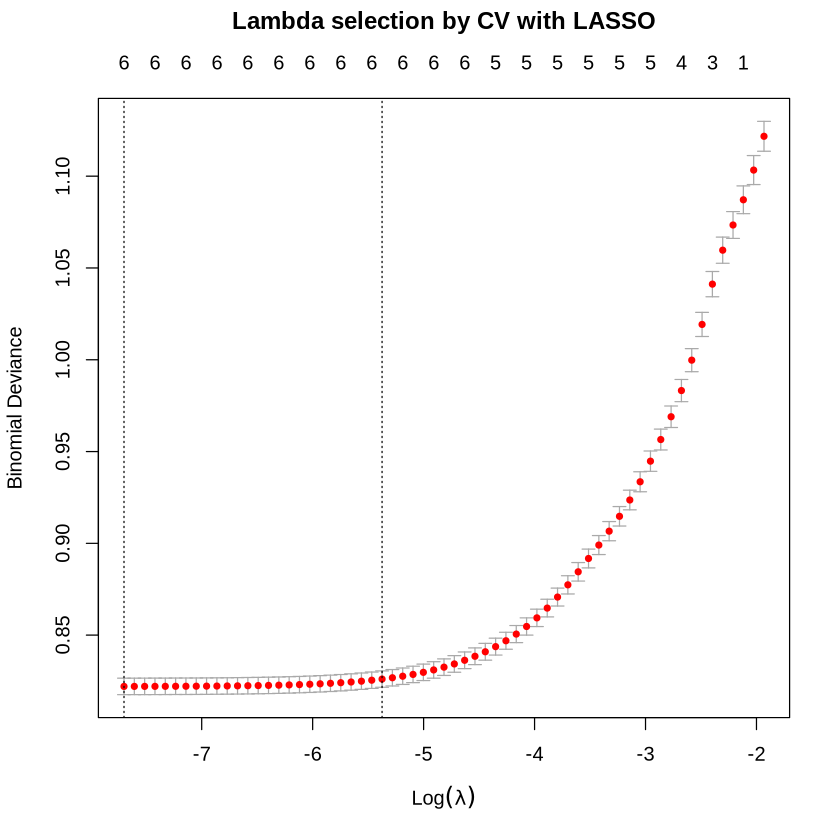

In [95]:
plot(lasso_model, main = "Lambda selection by CV with LASSO\n\n")

Then, extract the coefficients of the best lasso model (the one with the smallest MSE) found in the lasso_model. 

In [96]:
beta_lasso <- coef(lasso_model, s = "lambda.min")


beta_lasso

15 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    -8.529206e+00
age             4.492249e-02
workclass       .           
fnlwgt          7.844293e-07
education       .           
education_num   3.215929e-01
marital_status  .           
occupation      .           
relationship    .           
race            .           
sex             .           
capital_gain    3.290048e-04
capital_loss    6.958206e-04
hours_per_week  4.114520e-02
native_country  .           

Here are the names of the covariates selected by Lasso.

In [97]:
lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
        pull(covariate)
lasso_selected_covariates

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week"

Then, I can fit a logistic regression model with the selected features.

In [98]:
logistic_model <- glm(income ~., data = training_Income %>% select(income, all_of(lasso_selected_covariates)),
                      family = "binomial")

summary(logistic_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = income ~ ., family = "binomial", data = training_Income %>% 
    select(income, all_of(lasso_selected_covariates)))

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -8.603e+00  1.645e-01 -52.303  < 2e-16 ***
age             4.533e-02  1.688e-03  26.854  < 2e-16 ***
fnlwgt          8.253e-07  1.965e-07   4.199 2.68e-05 ***
education_num   3.240e-01  9.206e-03  35.189  < 2e-16 ***
capital_gain    3.403e-04  1.336e-05  25.473  < 2e-16 ***
capital_loss    7.047e-04  4.327e-05  16.284  < 2e-16 ***
hours_per_week  4.154e-02  1.835e-03  22.642  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20308  on 18095  degrees of freedom
Residual deviance: 14863  on 18089  degrees of freedom
AIC: 14877

Number of Fisher Scoring iterations: 7


After fitting the model, test the predictive performance on the testing dataset.

In [99]:
test_pred_prob <- predict(logistic_model, newdata = testing_Income %>% select(all_of(lasso_selected_covariates)), 
                          type = "response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8259

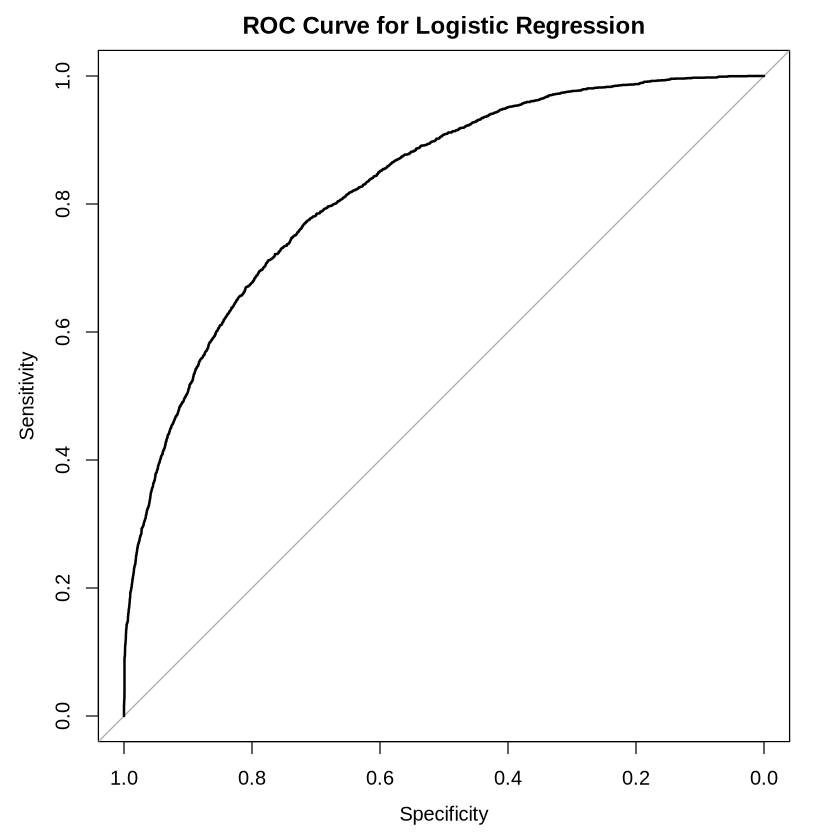

In [100]:
roc_curve <- roc(testing_Income$income, test_pred_prob)
plot(roc_curve, main = "ROC Curve for Logistic Regression")
auc(roc_curve)

The ROC curve shows that the logistic regression model has strong discriminatory power in predicting whether income exceeds $50K. The curve rises well above the diagonal reference line, indicating that the model effectively balances sensitivity and specificity. The AUC (Area Under the Curve) value of 0.826 confirms the model's ability to distinguish between the two income classes. This suggests that the logistic regression model, informed by LASSO-selected variables (which are different from the three chosen variables at the beginning), is a reliable predictor.